<div align="center">
    <img src="https://www.universidades.com.ec/logos/original/logo-universidad-politecnica-salesiana.png">
    <h1 style="text-align: center;"><span style="text-align: center; color: #0000ff;"><strong>EXAMEN DE SIMULACION</strong></span></h1>
    <p style="text-align: center;"><span style="text-align: center;"><strong>ESTUDIANTE: ANGEL RUIZ</strong></span></p>
</div>

<h2>
	<span style="color: #00ff00;">
		 Importaci&oacute;n de librerias
	</span>
</h2>
<p>
	<span>
	</span>
	 A continuaci&oacute;n se importaran todas las librer&iacute;as que se utilizaran en el proceso del
	<span class="misspelling correction" data-type="misspelling" data-suggestions="[{&quot;value&quot;:&quot;an&aacute;lisis&quot;},{&quot;value&quot;:&quot;ana lisis&quot;}]" data-rule="MORFOLOGIK_RULE_ES" title="Se ha encontrado un posible error ortogr&aacute;fico." data-word="analisis">
		 an&aacute;lisis
	</span>
	 y simulaci&oacute;n de los datos.
</p>

In [1]:
import pandas as pd
import json, os
import twint
import nest_asyncio
from mpl_toolkits.mplot3d import Axes3D
import random       
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split
from sklearn import linear_model
import altair as alt
import altair_viewer
import plotly.express as px
import plotly
plotly.offline.init_notebook_mode(connected=True)
import datetime as dt
import simpy
from datetime import datetime

<h2><span style="color: #00ff00;"> Extración de datos</span></h2>


In [23]:
nest_asyncio.apply()
c = twint.Config()

c.Username = "lassoguillermo"
c.Since = "2021-06-01"
c.Store_json = True
c.Output = "data"

twint.run.Search(c)

1400823866436489221 2021-06-04 09:36:50 -0500 <LassoGuillermo> Qué alegría me da escribirles este mensaje, para contarles que nos han confirmado que este domingo 6 de junio llegarán a nuestro país 204.000 dosis más de vacunas AstraZeneca.  Seguimos avanzando para cumplir con nuestro compromiso. 🇪🇨  #PlanVacunación9100 #JuntosLoLogramos
1400626814075215876 2021-06-03 20:33:49 -0500 <LassoGuillermo> Conoce los 5 ejes del Plan Nacional de Desarrollo Educativo. 🇪🇨  ◦ Encontrémonos ◦ ¡Todos! ◦ Libres y flexibles ◦ Fuertes 💪🏼 ◦ Excelencia educativa   #JuntosLoLogramos por un sistema educativo seguro y con oportunidades para todos.  https://t.co/ojqAMrTrCX
1400575566374391822 2021-06-03 17:10:11 -0500 <LassoGuillermo> Los gobernadores tienen el compromiso de trabajar por el bien exclusivo de la gente. Es un equipo que va a promover el Ecuador del encuentro con un solo objetivo: atender las necesidades de TODOS los ciudadanos en cada una de las provincias.  #JuntosLoLogramos  https://t.co/17Wg

<h2><span style="color: #00ff00;"> Importaci&oacute;n de datos</span></h2>
<p>Se importan los datasets que se ultizaran para obtener todos los datos necesarios</p>

In [24]:
df= pd.read_json('data/data.json',lines=True)
df.head()

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,...,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1398781708930068486,1398755815880863744,2021-05-29 18:22:02-05:00,2021-05-29,18:22:02,-500,300390462,lassoguillermo,Guillermo Lasso,,...,,,,,,"[{'screen_name': 'DeporteEc', 'name': 'Ministe...",,,,
1,1398754778876977153,1398754778876977152,2021-05-29 16:35:01-05:00,2021-05-29,16:35:01,-500,300390462,lassoguillermo,Guillermo Lasso,,...,,,,,,[],,,,
2,1398428301719478272,1398428301719478272,2021-05-28 18:57:43-05:00,2021-05-28,18:57:43,-500,300390462,lassoguillermo,Guillermo Lasso,,...,,,,,,[],,,,
3,1398404559706468355,1398404559706468352,2021-05-28 17:23:22-05:00,2021-05-28,17:23:22,-500,300390462,lassoguillermo,Guillermo Lasso,,...,,,,,,[],,,,
4,1398334078986903565,1398334078986903552,2021-05-28 12:43:18-05:00,2021-05-28,12:43:18,-500,300390462,lassoguillermo,Guillermo Lasso,,...,,,,,,[],,,,


In [4]:
df_tweets = df[['username', 'tweet', 'replies_count', 'likes_count', 'retweets_count']]
df_tweets.head()

,username,tweet,replies_count,likes_count,retweets_count
0,lassoguillermo,@DeporteEc ¡Grande Marizol! Ecuador es cuna de...,0,48,17
1,lassoguillermo,¡Felicidades @MorejonGlenda! Ella y más deport...,28,1213,216
2,lassoguillermo,¡Una buena noticia! @EmbajadaChinaEc me infor...,638,10703,1542
3,lassoguillermo,¡Primera visita a Guayas! Nos reunimos en la G...,134,2061,384
4,lassoguillermo,"En la reunión con el presidente del @el_BID, M...",134,1922,402


<h2><span style="color: #00ff00;"> Modelo Matemático</span></h2>
<p>Creamos nuestro modelo matemático de regresión multivariante, utilizando como entradas los replies y likes y así poder predecir cuantos retweets va a tener. Se eligieron estas variables, ya que una vez realizada el análisis de la data podemos observar la correlación que tienen las variables</p>

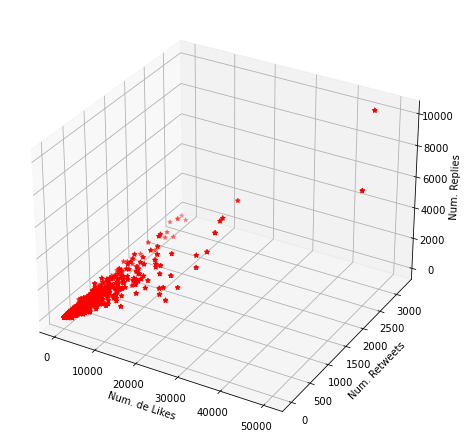

In [5]:
fig = pyplot.figure(figsize=(8, 6))       
ax = Axes3D(fig)

x1 = df_tweets["likes_count"]                            
x2 = df_tweets["replies_count"]                             
y = df_tweets["retweets_count"]                               

ax.scatter(x1, x2, y, marker='*', c='r')
ax.set_xlabel('Num. de Likes')        
ax.set_ylabel('Num. Retweets')      
ax.set_zlabel('Num. Replies');   

<h2>Definimos las variables</h2>


In [6]:
X_multiple = df_tweets[['replies_count', 'likes_count']]
y_multiple = df_tweets[['retweets_count']]

<h2>Separamos los datos para entrenamiento y pruebas</h2>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X_multiple, y_multiple, test_size=0.2)

<h2>Definimos el modelo matemático</h2>

In [8]:
lr_multiple = linear_model.LinearRegression()

<h2>Entrenamos nuestro modelo matemático</h2>

In [9]:
lr_multiple.fit(X_train, y_train)

LinearRegression()

In [10]:
print('DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE')
print()
print('Valor de las pendientes o coeficientes "a":')
print(lr_multiple.coef_)
print('Valor de la intersección o coeficiente "b":')
print(lr_multiple.intercept_)

DATOS DEL MODELO REGRESIÓN LINEAL MULTIPLE

Valor de las pendientes o coeficientes "a":
[[0.37070793 0.14055916]]
Valor de la intersección o coeficiente "b":
[7.57060296]


In [11]:
print('Precisión del modelo:')
print(lr_multiple.score(X_train, y_train))

Precisión del modelo:
0.9124527804960922


In [25]:
df = pd.DataFrame()

replies_count = [126,20]
likes_count = [30, 1200 ]

df['replies_count'] = replies_count
df['likes_count'] = likes_count

df.head()

,replies_count,likes_count
0,126,30
1,20,1200


In [26]:
Y_pred_multiple = lr_multiple.predict(df)

Y_pred_multiple

array([[ 58.49657696],
       [183.65575574]])

<h2><span style="color: #00ff00;">Simulación Covid</span></h2>
<p>Creamos una simulación de un recinto de vacunación, específicamente seleccioné el de colisión Jefferson Pérez, para ello primero definimos todas las variables globales que utilizaremos </p>

In [14]:
NUM_VACUNAS = 100
NUM_PERSONAS_VACUNANDO = 5
NUM_TOMANDO_DATOS = 5
NUM_CERTIFICADO = 5
TIEMPO_SIM = 540
TIEMPO_ESPERA = 0
INVERTAVALO = 4
DATE_SECOND = datetime.now().strftime('%Y/%m/%d')
List = []

Para realizar la simulacion vamos a utilizar clases ya que nos permite tener de forma ordenada nuestro codigo, teniendo en cuenta vamos a realizar las siguientes clases.

* Persona: El ciudadano a vacunar
* Vacunacion: Proceso de vacunacion
* Simulacion : Realiza la simulacion
* ProblemaExamen: Clase Exception

<h2>Una vez definidas nuestras clases, codificamos toda la logica de nuestra simulación</h2>

In [15]:
class ProblemaExamen(Exception):
    pass


class Persona():
    def __init__(self, nombre='', problema=0):
        self.nombre = nombre
        self.problema = problema
        self.reagendadaCita = ''
        self.sigDosis = ''


class VacunaException(Exception):
    pass


class Vacunacion():
    def __init__(self, entorno):
        global NUM_PERSONAS_VACUNANDO, NUM_CERTIFICADO, NUM_TOMANDO_DATOS, NUM_VACUNAS
        self.entorno = entorno
        self.persona_v = simpy.Resource(entorno, NUM_PERSONAS_VACUNANDO)
        self.persona_e = simpy.Resource(entorno, NUM_TOMANDO_DATOS)
        self.persona_c = simpy.Resource(entorno, NUM_CERTIFICADO)
        self.vacunas = NUM_VACUNAS
        self.examen = None
        self.probabilidad = [0.8, 0.2]
        self.examen_result = [0, 1]

    def print_process(self, persona, hora, accion):
        print(
            '[{}] || Hora:[{:,.2f}] || Accion [{}].'.format(persona, hora, accion))

    def proceso_examen(self, tiempo):
        self.examen = random.choices(
            self.examen_result, self.probabilidad, k=1)
        yield self.entorno.timeout(tiempo)

    def datos_certificados(self, tiempo):
        yield self.entorno.timeout(tiempo)

    def vacunacion_persona(self, tiempo):
        self.vacunas = self.vacunas-1
        yield self.entorno.timeout(tiempo)

    def proceso_certifcado(self, tiempo):
        yield self.entorno.timeout(tiempo)

    def proceso_salida(self, tiempo):
        yield self.entorno.timeout(tiempo)

    def proceso_vacunacion(self, persona):
        global List
        tiempo_examen = 0
        tiempo_datos = 0
        tiempo_vacuna = 0
        tiempo_certificado = 0
        tiempo_salida = 0
        resultado_vacuna = 0
        tiempo_espera = 0

        self.print_process(persona.nombre, self.entorno.now,
                           'Llega al recinto')
        espera = self.entorno.now
        with self.persona_e.request() as mesa:
            yield mesa
            self.print_process(
                persona.nombre, self.entorno.now, 'Llego a la mesa')
            self.print_process(persona.nombre, self.entorno.now,
                               'Entra al proceso de examen')
            tiempo_espera = self.entorno.now - espera
            tiempo_examen = 20

            yield self.entorno.process(self.proceso_examen(tiempo_examen))

        try:
            if(self.examen[0] == 0):
                resultado_vacuna = 1
                self.print_process(
                persona.nombre, self.entorno.now, 'Paso el proceso de revisión')

                with self.persona_c.request() as certificado:
                    self.print_process(persona.nombre, self.entorno.now, 'Entra al proceso de toma de datos')
                    yield certificado
                    tiempo_datos = random.randint(2, 4)
                    yield self.entorno.process(self.datos_certificados(tiempo_datos))
                    self.print_process(persona.nombre, self.entorno.now, 'Se tomaron los datos')

                    with self.persona_v.request() as vacunacion:
                        yield vacunacion

                        try:
                            if(self.vacunas > 0):
                                self.print_process(
                                persona.nombre, self.entorno.now, 'Llegó a la vacunacion')
                                tiempo_vacuna = random.randint(5, 10)
                                yield self.entorno.process(self.vacunacion_persona(tiempo_vacuna))
                                self.print_process(
                                persona.nombre, self.entorno.now, 'Vacunacion correcta')

                                tiempo_certificado = random.randint(1, 3)
                                yield self.entorno.process(self.proceso_certifcado(tiempo_certificado))
                                persona.sigDosis = datetime.strftime(datetime.strptime(DATE_SECOND, '%Y/%m/%d')+dt.timedelta(days=21), '%Y/%m/%d')
                                self.print_process(
                                persona.nombre, self.entorno.now, 'Se entrega el certicado, la siguiente cita es {}'.format(persona.reagendadaCita))
                            else:
                                raise VacunaException
                        except VacunaException:
                            persona.reagendadaCita = datetime.strftime(datetime.strptime(DATE_SECOND, '%Y/%m/%d')+dt.timedelta(days=random.randint(2,5)), '%Y/%m/%d')
                            resultado_vacuna = 0
                            self.print_process(
                            persona.nombre, self.entorno.now, 'No se realizo la vacunacion, Proxima fecha {}'.format(persona.reagendadaCita))
            else:
                raise ProblemaExamen
        except ProblemaExamen:
            persona.reagendadaCita = datetime.strftime(datetime.strptime(DATE_SECOND,'%Y/%m/%d')+dt.timedelta(days=random.randint(2,5)),'%Y/%m/%d')
            resultado_vacuna = 0
            self.print_process(persona.nombre, self.entorno.now, 'No pasó el proceso de vacunacion, Proxima fecha {}'.format(persona.reagendadaCita))
        tiempo_salida = random.randint(1,5)
        self.entorno.process(self.proceso_salida(tiempo_salida))
        self.print_process(persona.nombre, self.entorno.now, 'Sale del recinto')
        List.append((persona.nombre,persona.sigDosis,persona.reagendadaCita,tiempo_examen,tiempo_datos,tiempo_vacuna,tiempo_certificado,tiempo_salida,tiempo_espera,resultado_vacuna))
            
class Simulacion():
    def __init__(self, personas_simulacion):
        self.personas_simulacion = personas_simulacion
        self.nombre = 'persona_{}'
    
    def lanzarSimulacion(self,entorno):
        global INVERTAVALO
        vacunacion = Vacunacion(entorno)
    
        self.iniciarPersona(entorno,vacunacion)
        
        while True:
            yield entorno.timeout(random.randint(INVERTAVALO-2, INVERTAVALO+2))
            nombre = self.nombre.format(self.personas_simulacion)
            persona = Persona(nombre)
            entorno.process(vacunacion.proceso_vacunacion(persona))
            self.personas_simulacion+=1
    
    def iniciarPersona(self,entorno,vacunacion):
        for i in range(self.personas_simulacion):
            nombre = self.nombre.format(i)
            persona = Persona(nombre)
            entorno.process(vacunacion.proceso_vacunacion(persona))
            


<h2>Ejecutamos nuestra simulación</h2>

In [16]:
entorno = simpy.Environment()
simulacion = Simulacion(7)
entorno.process(simulacion.lanzarSimulacion(entorno))
entorno.run(until=TIEMPO_SIM)

[persona_0] || Hora:[0.00] || Accion [Llega al recinto].
[persona_1] || Hora:[0.00] || Accion [Llega al recinto].
[persona_2] || Hora:[0.00] || Accion [Llega al recinto].
[persona_3] || Hora:[0.00] || Accion [Llega al recinto].
[persona_4] || Hora:[0.00] || Accion [Llega al recinto].
[persona_5] || Hora:[0.00] || Accion [Llega al recinto].
[persona_6] || Hora:[0.00] || Accion [Llega al recinto].
[persona_0] || Hora:[0.00] || Accion [Llego a la mesa].
[persona_0] || Hora:[0.00] || Accion [Entra al proceso de examen].
[persona_1] || Hora:[0.00] || Accion [Llego a la mesa].
[persona_1] || Hora:[0.00] || Accion [Entra al proceso de examen].
[persona_2] || Hora:[0.00] || Accion [Llego a la mesa].
[persona_2] || Hora:[0.00] || Accion [Entra al proceso de examen].
[persona_3] || Hora:[0.00] || Accion [Llego a la mesa].
[persona_3] || Hora:[0.00] || Accion [Entra al proceso de examen].
[persona_4] || Hora:[0.00] || Accion [Llego a la mesa].
[persona_4] || Hora:[0.00] || Accion [Entra al proces

<h2>Con los datos obtenidos de nuestra simulación, creamos un DataFrame para su facil tratamiento</h2>

In [17]:
df_data = pd.DataFrame(List, columns=['nombre','Siguiente Dosis','Cita Reagendada','tiempo_exam','tiempo_datos','tiempo_vacuna','tiempo_certificado','tiempo_salida', 'tiempo_espera' , 'resultado_vacuna'])
df_data['id'] = df_data['nombre'].apply(lambda x:int(x.split('_')[1]))
df_data.set_index('id', inplace=True)
df_data.reset_index(inplace=True)
df_data = df_data.convert_dtypes()
df_data['tiempo_total'] = df_data['tiempo_exam']+df_data['tiempo_datos']+df_data['tiempo_vacuna']+df_data['tiempo_certificado']+df_data['tiempo_salida']
df_data

,id,nombre,Siguiente Dosis,Cita Reagendada,tiempo_exam,tiempo_datos,tiempo_vacuna,tiempo_certificado,tiempo_salida,tiempo_espera,resultado_vacuna,tiempo_total
0,0,persona_0,2021/06/25,,20,2,6,1,1,0,1,30
1,3,persona_3,2021/06/25,,20,2,6,2,5,0,1,35
2,2,persona_2,2021/06/25,,20,2,8,2,4,0,1,36
3,1,persona_1,2021/06/25,,20,2,9,3,2,0,1,36
4,4,persona_4,2021/06/25,,20,4,9,3,2,0,1,38
...,...,...,...,...,...,...,...,...,...,...,...,...
125,125,persona_125,,2021/06/07,20,3,0,0,5,11,0,28
126,126,persona_126,,2021/06/07,20,3,0,0,5,7,0,28
127,127,persona_127,,2021/06/08,20,3,0,0,3,3,0,26
128,128,persona_128,,2021/06/07,20,2,0,0,2,2,0,24


<h2><span style="color: #00ff00;">Gráficos</span></h2>

<h2>Total de de personas que realizaron el proceso de vacunación.</h2>

In [18]:
alt.Chart(df_data[df_data['resultado_vacuna']==1]).mark_bar(color='orange').encode(
    x=alt.X('nombre',sort=alt.EncodingSortField(field="id", op="count", order='ascending')),
    y='tiempo_total'
    )+alt.Chart(df_data[df_data['resultado_vacuna']==1]).mark_point(color='green').encode(
        x=alt.X('nombre',sort=alt.EncodingSortField(field="id", op="count", order='ascending')),
        y='tiempo_total').properties(title='Tiempo total - Recinto Jefferson Perez').interactive()

alt.LayerChart(...)

<h2>Grafico del porcentaje de personas que no recibieron la vacuna.</h2>

In [19]:
dict_vacunas = {'vacunados':['Si','No'],
               'values':[df_data.query('resultado_vacuna == "1"').count()[0]/len(df_data),
                         df_data.query('resultado_vacuna == "0" ').count()[0]/len(df_data)]}
dict_vacunas=pd.DataFrame(dict_vacunas)
dict_vacunas

,vacunados,values
0,Si,0.769231
1,No,0.230769


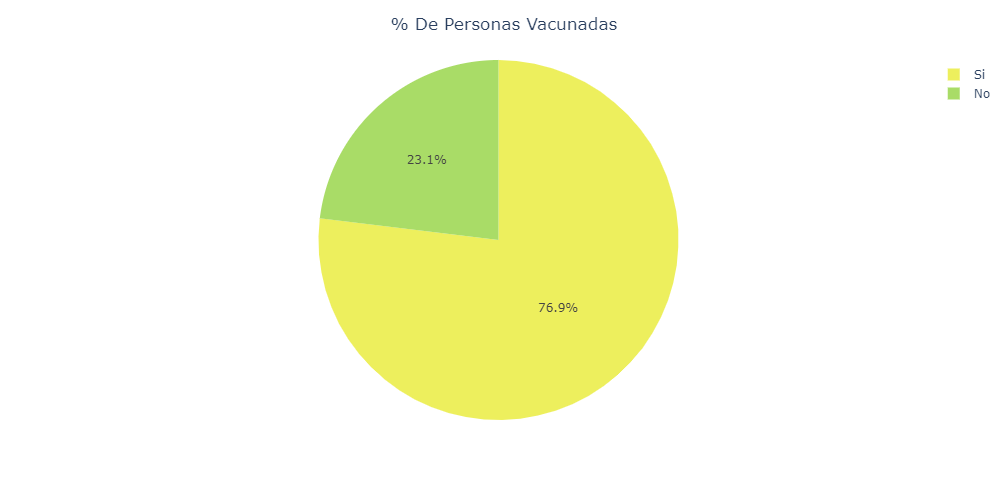

In [20]:
fig = px.pie(dict_vacunas, values="values",
             names="vacunados", 
             color_discrete_sequence=px.colors.sequential.Aggrnyl_r,width=500,height=500)
fig.update_layout(title_text='% De Personas Vacunadas', title_x=0.5)

<h2>Tiempo promedio de espera.</h2>

In [21]:
print('Tiempo promedio de la espera es de {:.2f}'.format(df_data['tiempo_espera'].mean()))

Tiempo promedio de la espera es de 12.13


In [22]:
alt.Chart(df_data[df_data['resultado_vacuna']==1]).mark_bar(color='orange').encode(
    x=alt.X('nombre',sort=alt.EncodingSortField(field="id", op="count", order='ascending')),
    y='tiempo_espera'
    )+alt.Chart(df_data[df_data['resultado_vacuna']==1]).mark_point(color='green').encode(
        x=alt.X('nombre',sort=alt.EncodingSortField(field="id", op="count", order='ascending')),
        y='tiempo_espera').properties(title='Tiempo de espera - Recinto Jefferson Perez').interactive()

alt.LayerChart(...)